<a href="https://colab.research.google.com/github/Smjfirna/Arsitektur-Compration/blob/main/Eksperimen_Sample/MobileNet/%2090%3A10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, Model, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, Dropout
import os
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

from keras.applications import ResNet50

In [6]:
base_dir = '/content/drive/MyDrive/Skripsi Syafirna/Program/Data Sample 10'

print("Contents of base directory:")
print(os.listdir(base_dir))

Contents of base directory:
['Common_rust', 'Blight', 'Healthy', 'Gray_leaf_spot']


In [7]:
Common_rust_dir = os.path.join(base_dir, 'Common_rust')
Blight_dir = os.path.join(base_dir, 'Blight')
Healthy_dir = os.path.join(base_dir, 'Healthy')
Gray_leaf_spot_dir = os.path.join(base_dir, 'Gray_leaf_spot')

In [8]:
Common_rust_fnames = os.listdir(Common_rust_dir)
Blight_fnames = os.listdir(Blight_dir)
Healthy_fnames = os.listdir(Healthy_dir)
Gray_leaf_spot_fnames = os.listdir(Gray_leaf_spot_dir)

In [9]:
print('Total Gambar Common rust :', len(os.listdir(Common_rust_dir)))
print('Total Gambar Blight :', len(os.listdir(Blight_dir)))
print('Total Gambar Healty :', len(os.listdir(Healthy_dir)))
print('Total Gambar Gray Leaf Spot :', len(os.listdir(Gray_leaf_spot_dir)))

Total Gambar Common rust : 130
Total Gambar Blight : 114
Total Gambar Healty : 116
Total Gambar Gray Leaf Spot : 57


In [23]:
img_height = 224
img_width = 224
img_channels = 3
num_epochs= 10

datagen = ImageDataGenerator( rescale = 1.0/255.,
                             validation_split=0.1
                            )

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    class_mode='categorical',
    subset='validation'
)

Found 377 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [24]:
# Initialize ResNet50 base model
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, img_channels))

# Freeze the convolutional base
for layer in resnet50_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()
model.add(resnet50_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='sigmoid'))

In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
12/12 [==============================] - 10s 462ms/step - loss: 19.4236 - accuracy: 0.2679 - val_loss: 4.0322 - val_accuracy: 0.4500
Epoch 2/10
12/12 [==============================] - 5s 413ms/step - loss: 3.2095 - accuracy: 0.4191 - val_loss: 2.2773 - val_accuracy: 0.1250
Epoch 3/10
12/12 [==============================] - 5s 436ms/step - loss: 1.5521 - accuracy: 0.4430 - val_loss: 1.0797 - val_accuracy: 0.7000
Epoch 4/10
12/12 [==============================] - 5s 355ms/step - loss: 1.2391 - accuracy: 0.4695 - val_loss: 1.2488 - val_accuracy: 0.4750
Epoch 5/10
12/12 [==============================] - 5s 437ms/step - loss: 1.0398 - accuracy: 0.5836 - val_loss: 0.9458 - val_accuracy: 0.7000
Epoch 6/10
12/12 [==============================] - 5s 375ms/step - loss: 0.9458 - accuracy: 0.6180 - val_loss: 0.8484 - val_accuracy: 0.7250
Epoch 7/10
12/12 [==============================] - 5s 443ms/step - loss: 1.0331 - accuracy: 0.5703 - val_loss: 0.8640 - val_accuracy: 0.6500
Epoc

2/2 [==============================] - 1s 14ms/step


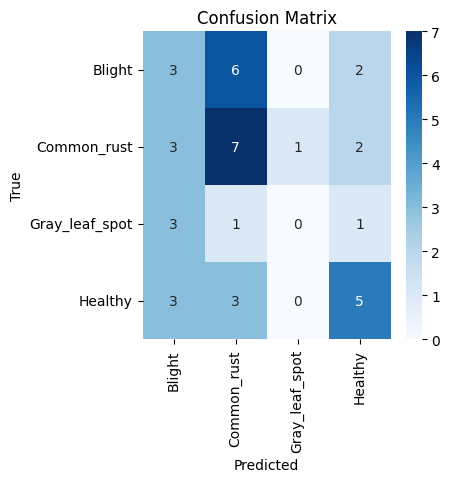


Classification Report:
                 precision    recall  f1-score   support

        Blight       0.25      0.27      0.26        11
   Common_rust       0.41      0.54      0.47        13
Gray_leaf_spot       0.00      0.00      0.00         5
       Healthy       0.50      0.45      0.48        11

      accuracy                           0.38        40
     macro avg       0.29      0.32      0.30        40
  weighted avg       0.34      0.38      0.35        40



In [27]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes

conf_matrix = confusion_matrix(y_true, y_pred)

# Tampilkan confusion matrix menggunakan seaborn heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print('\nClassification Report:\n', classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys()))